In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import re

In [2]:
stop_words = set(stopwords.words('english'))

df = pd.read_csv("bbc_news.csv")
texts = (df['title'] + " " + df['description']).tolist()

In [3]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

processed_texts = [preprocess(text) for text in texts]

In [4]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(processed_texts)

🔹 LDA Topics:

--- Topic 1 ---
world | england | cup | says | new | star | one | first | bbc | womens


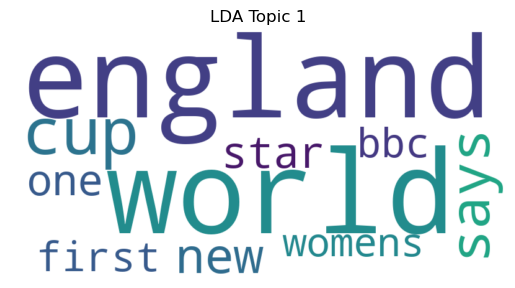


--- Topic 2 ---
says | manchester | new | king | bbc | queen | city | day | prince | man


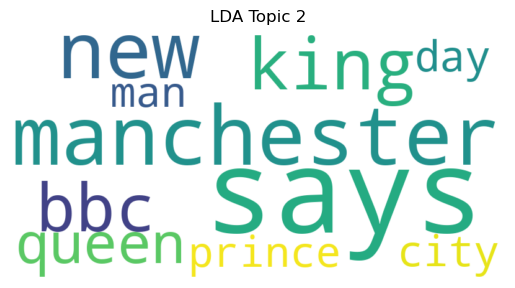


--- Topic 3 ---
win | league | cup | world | first | final | watch | beat | title | victory


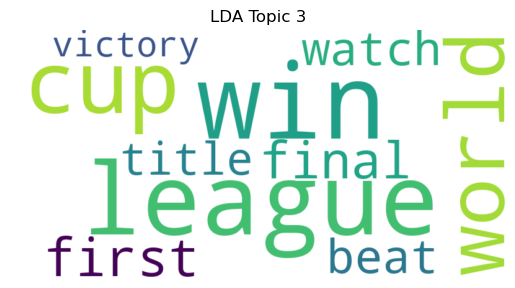


--- Topic 4 ---
ukraine | uk | war | people | says | say | police | russian | russia | us


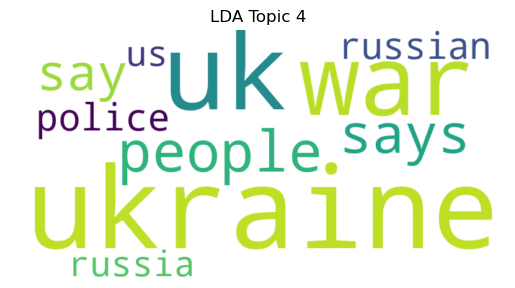


--- Topic 5 ---
says | election | papers | us | minister | new | bbc | government | former | labour


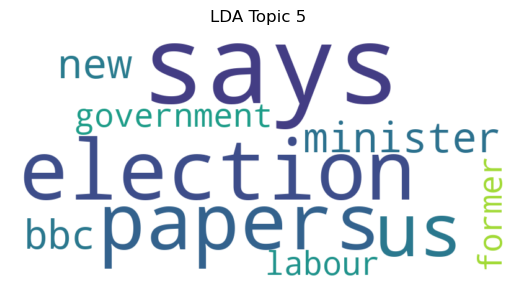

In [5]:
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

print("🔹 LDA Topics:")
for topic_idx, topic in enumerate(lda.components_):
    print(f"\n--- Topic {topic_idx+1} ---")
    top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words-1:-1]]
    print(" | ".join(top_words))

    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_top_words-1:-1]}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"LDA Topic {topic_idx+1}")
    plt.show()


In [6]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(processed_texts)
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(X_tfidf)

,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0



🔹 NMF Topics:

--- NMF Topic 1 ---
says | uk | people | new | police | election | us | say | bbc | could


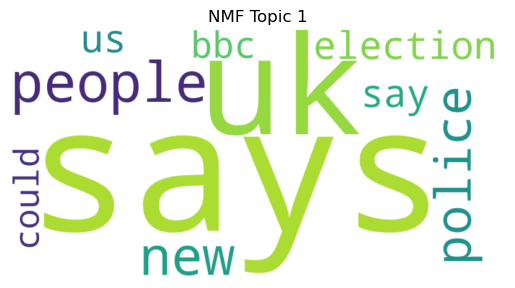


--- NMF Topic 2 ---
world | cup | england | womens | final | win | wales | australia | watch | france


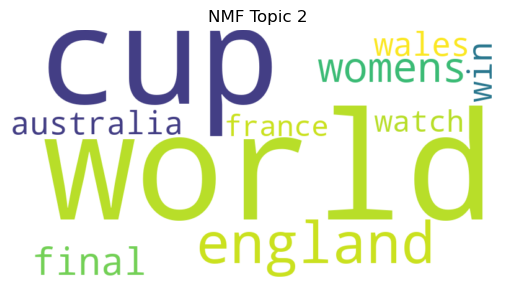


--- NMF Topic 3 ---
ukraine | war | russian | russia | ukrainian | russias | invasion | putin | kyiv | says


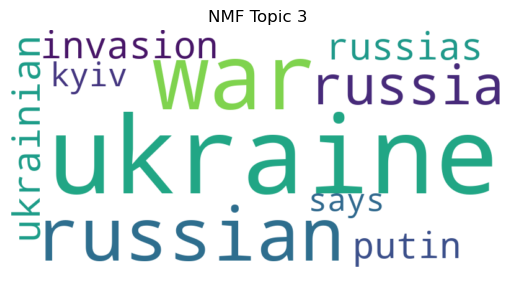


--- NMF Topic 4 ---
week | days | seven | past | selection | pictures | images | quiz | closely | attention


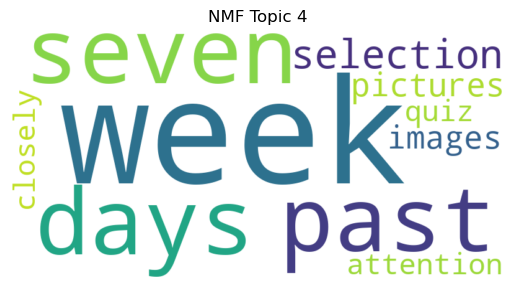


--- NMF Topic 5 ---
league | manchester | city | premier | united | win | champions | man | liverpool | arsenal


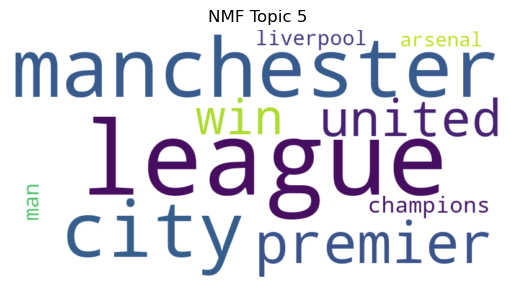

In [7]:
print("\n🔹 NMF Topics:")
for topic_idx, topic in enumerate(nmf.components_):
    print(f"\n--- NMF Topic {topic_idx+1} ---")
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-num_top_words-1:-1]]
    print(" | ".join(top_words))

    word_freq = {tfidf_vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-num_top_words-1:-1]}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"NMF Topic {topic_idx+1}")
    plt.show()